In [62]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
samples = pd.read_csv('../data/input/X_train.csv')
target = pd.read_csv('../data/input/y_train.csv')

In [64]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(samples, target)

Original dataset shape : Counter({0: 1677939, 1: 343509})
Resampled dataset shape : Counter({0: 1677939, 1: 1677939})


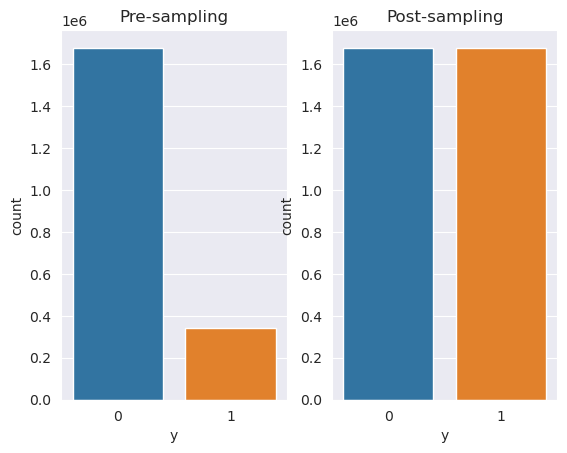

In [65]:
random_sample = RandomOverSampler()
X_new, y_new = random_sample.fit_resample(samples, target)
print(f'Original dataset shape : {Counter(target["y"])}')
print(f'Resampled dataset shape : {Counter(y_new["y"])}')
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Pre-sampling')
ax[1].set_title('Post-sampling')
sns.countplot(data=target, x='y', ax=ax[0])
sns.countplot(data=y_new, x='y', ax=ax[1])
plt.show()

In [66]:
X_train, y_train, X_test, y_test = train_test_split(X_new, y_new, stratify=y_new, test_size=0.3, random_state=1234)

In [67]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head(2)

ValueError: could not convert string to float: 'd7714196'